# Iris Analysis
In this exercise, I will be using the classic *iris* data set to practice exploratory data analysis.

The iris data set contains petal and sepal lengths and widths for three different species of irises. This data is one of the typical first data sets used in learning data science because it contains measures and dimensions that are distinct enough from each other to permit conclusions to be drawn about the different species, but similar enough that the data requires deeper analysis.

This tutorial will use some of the Python libraries that you will be learning in this course to demonstrate how they can be used in data analysis. The goal of this assignment is not for you to write code, but rather for you to learn to use Markdown instead of inline Python comments since they provide your code with additional formatting options and thus greater readability. As you reformat the comments in this code to be Markdown, I hope that you may also gain an appreciation for how Jupyter Lab works and start thinking about how you will use the libraries that you will learn in your future data analytics projects.

#### Import the pandas library
Pandas is a library that converts data into Python objects called "dataframes", which are similar to tables in structure. However, unlike regular tables, pandas dataframes come equipped with pre-built functions that allow for quick analysis and cleaning.

In [2]:
import pandas as pd

#### Import the dataset and save to a variable
In the first line of this cell, I save the name of the data file as a string to a variable. That makes it easier to read.

Then, I use the pandas method `read_csv()` to import the CSV file into a pandas dataframe, assigning it into a variable that I will easily remember as a dataframe "df".

In [3]:
filename = 'iris.csv'
df = pd.read_csv(filename) # Pandas automatically converts this CSV file 
                           # to a dataframe

#### View the first five rows of the data frame
The `df.head()` function automatically returns the dataframe's first ten rows, although any number can be passed in to see that many rows. In this case, I pass in the number 5 to see the first five rows.

You can also use the function `df.tail()` to get the last ten rows of the dataframe.

In [4]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Get the column names and types
It looks like there are five different columns in this data. Four of them have a data type "float64" (NumPy's way of saying "a precise floating point number") and one column has a data type "object", which generally means that it contains text.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Get unique species
Let's see the unique species in this data frame.
Notice how it returns a NumPy array!

In [6]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Get summary statistics
Here we can see some summary statistics about quantitative fields in the dataframe. It looks like the following averages occur in this data set:
- sepal length: 5.843
- sepal width: 3.054
- petal length: 3.759
- petal width: 1.199

That might be interesting to take note of...

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Get averages... aggregated by species
To perform aggregate functions across groups, we first need to group the data just as we would in SQL. The `.groupby()` function takes in a column name and returns a DataFrameGroupBy object. An aggregate function `.agg()` can then be performed on the object.

Here we see an entirely new dataframe that was returned by the groupby. It looks like the means of each measure (sepal and petal lengths and widths) are quite different from each other, with the mean petal length for the Iris-setosa species being particularly different from the others.

In [8]:
mean_df = df.groupby("species").agg(["mean"])
mean_df

,sepal_length,sepal_width,petal_length,petal_width
,mean,mean,mean,mean
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


We can also look at the median for each measure across the species.

In [9]:
median_df = df.groupby("species").agg("median")
median_df

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


Let's take a look at the standard deviations of each of the variables regardless of the species. This might help us get a better direction for generating some graphs. Whichever variable has the greatest standard deviation is the one we'll study more in-depth.

It looks like "Petal Length" has the greatest standard deviation. Standard deviation isn't always a reason to explore a variable more carefully, but it can be useful if you just need some direction to get started, and *and it might be an important variable after all!*

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plots
Now that we have explored the data a little bit using pandas, let's look at the data with matplotlib in graphs.

Let's choose a single measure of the irises to examine more closely. We'll use Petal Length as decided previously.

#### Import matplotlib
Matplotlib is a Python library used to plot data into graphs. It makes use of Axis objects, which receive the data and are then placed on to a Plot object. The plot can then be shown with the `.show()` function.

Notice that we are just importing the pyplot file from the matplotlib package. This is common convention.

In [11]:
import matplotlib.pyplot as plt

First, lets make a histogram that shows Petal Length among all the species of irises. To do this, we will run the subplots function of the pyplot file (imported under the alias 'plt'). This function returns both a figure (where the data will be shown) and an axis.

The figure will be blank at first, since we haven't added anything to the axis yet!

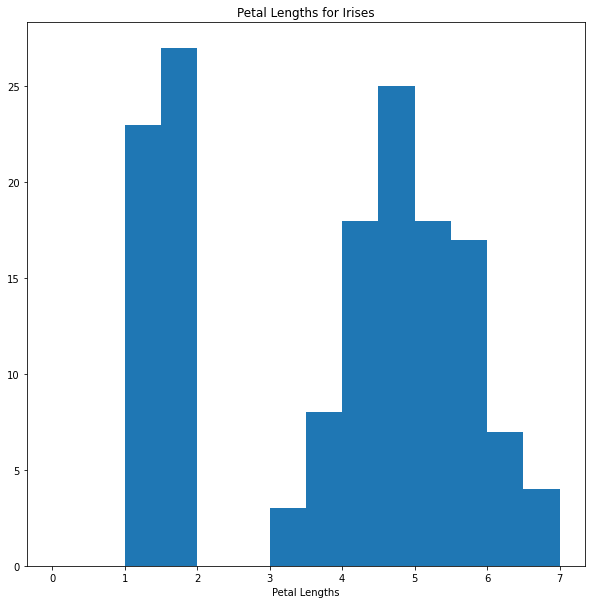

In [12]:
plt.figure(figsize=(10,10))
plt.title("Petal Lengths for Irises")
plt.xlabel("Petal Lengths")

bins = 14 
hist_range = (0, 7)
x = df['petal_length'] # the column to be the x axis

plt.hist(x, bins, range=hist_range) # add the histogram to the axis
plt.show()

Above we set the number of bins to 14 and the range from 0 to 7. That way, a bin is created for values 0 to 0.5, 0.5 to 1.0, and so on. We also made a variable called `x` that was given all the values in the column "petal_length". Finally, we called the `.hist()` method of the axis object, assigning the histogram values, a number of bins, and a range, finalizing by calling the fig to make it appear.

As you can see in the histogram, there appear to be two major groups of irises in terms of Petal Length that are manifest by the bimodal distribution. However, we may want to examine this more closely **to see if the variable Petal Length is, in reality, significantly different for one species compared to others**.

Next, let's build a box-and-whisker and then a violinplot to examine the distribution of petal lengths between groups.

The first task is to clear the figure and get a new Axis. You can use `fig.clear()` to clear the figure, but the easiest way to make a new figure and Axis is simply by calling the code above again.

Next, we'll make a different list of values for each species. These lines filter out the rows of the original data frame and assign the new data frame to a variable, keeping only the column `petal_length`

In [13]:
setosa_df = df[ df['species'] == 'Iris-setosa']
versicolor_df = df[ df['species'] == 'Iris-versicolor']
virginica_df = df[ df['species'] == 'Iris-virginica']
data = [setosa_df['petal_length'], versicolor_df['petal_length'], virginica_df['petal_length']]

Now, lets run the box plot function of the axis

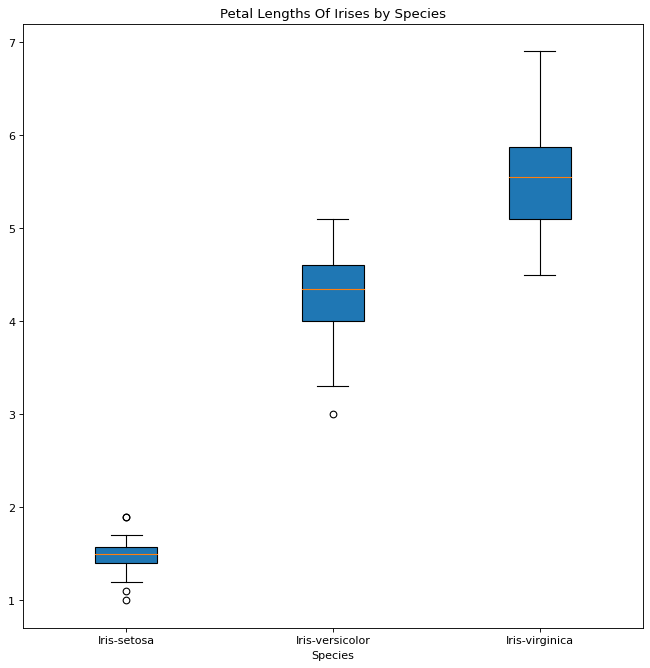

In [14]:
plt.figure(figsize=(10,10), dpi=80)
plt.title("Petal Lengths Of Irises by Species")
plt.xlabel("Species")

plt.boxplot(data, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], patch_artist=True)
plt.show()

Isn't this cool? Looking at this graph, we can make a lot more sense of the differences between these different Iris species. Iris-versicolor and Iris-virginica are more similar to each other than Iris-setosa, but really, the medians of all Iris species are quite different.

Let's combine the petal length with the other attributes and look at the petal width, sepal length, and sepal width as well.

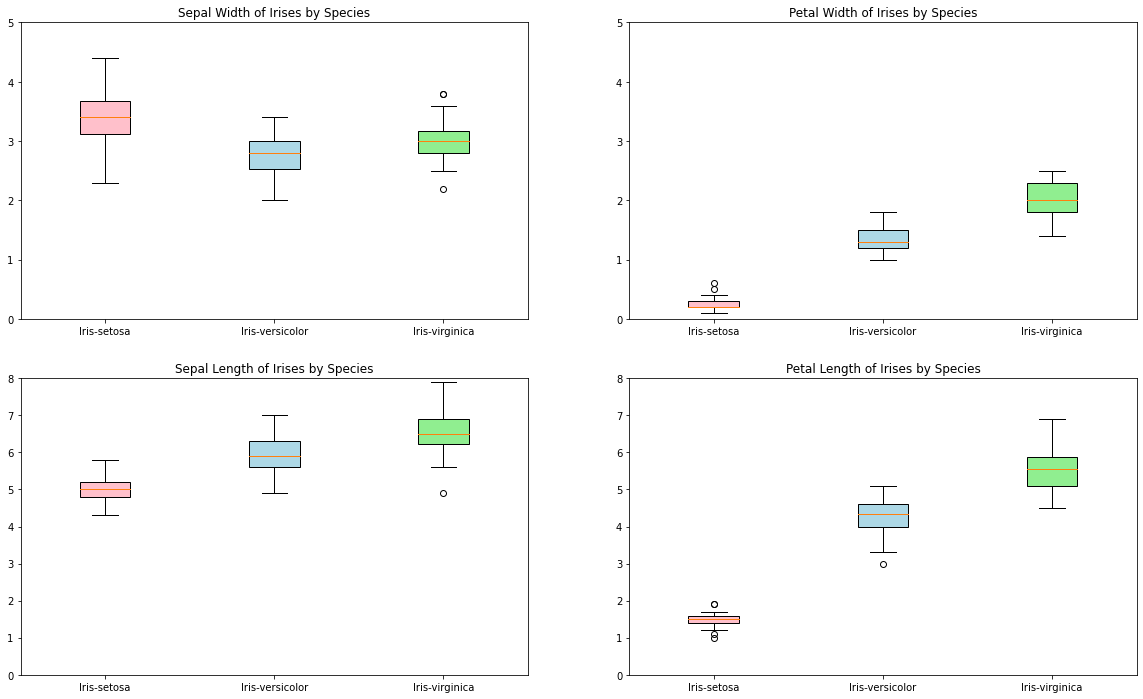

In [15]:
petalwidth_data = [setosa_df['petal_width'], versicolor_df['petal_width'], virginica_df['petal_width']]
sepallength_data = [setosa_df['sepal_length'], versicolor_df['sepal_length'], virginica_df['sepal_length']]
sepalwidth_data = [setosa_df['sepal_width'], versicolor_df['sepal_width'], virginica_df['sepal_width']]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))


ax1.set_title('Sepal Width of Irises by Species')
ax1.set_ylim([0,5])
ax1 = ax1.boxplot(sepalwidth_data, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], patch_artist=True)

ax2.set_title('Petal Width of Irises by Species')
ax2.set_ylim([0,5])
ax2 = ax2.boxplot(petalwidth_data, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], patch_artist=True)

ax3.set_title('Sepal Length of Irises by Species')
ax3.set_ylim([0,8])
ax3 = ax3.boxplot(sepallength_data, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], patch_artist=True)

ax4.set_title('Petal Length of Irises by Species')
ax4.set_ylim([0,8])
ax4 = ax4.boxplot(data, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], patch_artist=True)

colors = ['pink', 'lightblue', 'lightgreen'] # Set colors
for bplot in (ax1, ax2, ax3, ax4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

This has been a short exploratory analysis of the Iris data set. There is definitely more that we could do in terms of of visualizations and analyses to learn more about the differences between these irises, but the visualizations produced thus far suffice to give us a quick idea of how the 